In [1]:
!pip install pandas
!pip install matplotlib

# **Lab report: Freely Falling object**

**Introduction**

Free falling is the linear motion of an object in which only the force of gravity is acting on the object, expressed as the weight of the object. With Python makes it easier and faster to solve physic problems like the acceleration of a free falling object. 

**Objective**

1. Presenting and plotting a physical experiment using the Python programming 
language.
2. find the gravity acceleration for free falling object.
3. learn new things about python and work on it




## Installing necessary libraries

In [2]:
from IPython.display import HTML ,Image
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()

'C:\\Users\\Basheer'

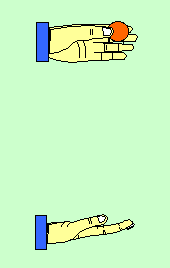

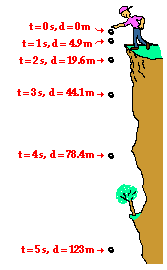

In [6]:
html = ''

heading = '<h1 style="font-size:22px; color:brown;">Freely Falling object</h1>'
html += heading

sub_heading = '<h2 style="font-size: 18px; color: goldenrod; margin-bottom: 10px;">Introduction</h2>'
html += sub_heading

p1 = '<p style="font-size: 16px; color: dodgerblue;">A free falling object is an object that is falling under the sole influence of gravity. \
        Any object that is being acted upon only by the force of gravity is said to be in a state of free fall.\
      </p>'
html += p1

p2 = '<p style="font-size: 16px; color: green;">There are two important motion characteristics that are true of free-falling objects:</p>'
html += p2;

ol = '''
  <ol>
    <li style="color: #5a3c78;">Free-falling objects do not encounter air resistance.</li>
    <li style="color: #5a3c78;">
        All free-falling objects (on Earth) accelerate downwards at a rate of <code>9.8m/s</code>.
        <br />
        (Often approximated as <code>10m/s</code> for back-of-the-envelope calculations.)
    </li>
  </ol>
'''

html += ol



sub_heading2 = '<h2 style="font-size: 18px; color: goldenrod; margin-bottom: 10px;">The Slope: </h2>'
html += sub_heading2


point1 = {}
point1["x"] = 0.649
point1["y"] = 0.14
point2 = {}
point2["x"] = 0.294
point2["y"] = 0.6

slop = (point2["y"]-point1["y"])/(point2["x"]-point1["x"])

p3 = f'\
  <p style="color: #5a3c78; position: relative;">\
    Slope of the graph <code>T&sup2;(s&sup2;)</code> versus <code>h(m)</code>: <br />\
    Points = ({point1["x"]},{point1["y"]}),({point2["x"]},{point2["y"]}) <br />\
    slope forumla = (y2-y1) / (x2-x1) <br /> \
    slop = {slop}\
  </p><br /> \
  '
html += p3

p4 = '<p style="color: red;">From the slope value find the gravity acceleration value: </p>'
html += p4

p5 = f'<p style="color: gray;">gravity acceleration =  {slop}</p>'
html += p5

p6 = '<p style="color: tomato;">the experimental error for the following measurements :</p>'
html += p6

p7 = '<p style="color: dodgerblue;">Smart time (+0.005 ,-0.005) mes , micrometer percentage error (+0.005 ,-0.005) mm</p>'
html += p7


p8 = '<p>How does your value for ‘g’ compare to the accepted value of the acceleration of a free- falling object (9.81 m/s&sup2;) ?</p>'
html += p8

p9 = '<p>If the mass of the ball is increased, what will be the value of g?</p>'
html += p9

p9 = '<p>It\'s will be <strong><i>constant</i></strong>.</p>'
html += p9

# Specify the paths or URLs to the GIF files
gif_path1 = '.\\Picture1.gif'
gif_path2 = '.\\Picture2.gif'

# Create Image instances for the GIFs
image1 = Image(filename=gif_path1, format='gif')
image2 = Image(filename=gif_path2, format='gif')

display(HTML(html))


# Display the GIFs
display(image1)
display(image2)


In [7]:
data = {
    'D(mm)': [11.95],
    'r(mm)': [5.975]
}

df1 = pd.DataFrame(data)

# Convert 'r(mm)' to 'r(m)' by dividing by 1000
df1['r(m)'] = df1['r(mm)'] / 1000


In [8]:
df1

,D(mm),r(mm),r(m)
0,11.95,5.975,0.005975


In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('.\\table.csv')

# Add column 'h(m)' by dividing 'h(cm)' by 100
df['h(m)'] = df['h(cm)'] / 100

# Extract the value from df1['r(m)']
r_m_value = df1['r(m)'].values[0]

# Subtract 'h(m)' from 'r(m)' and assign it to 'h-r(m)' column
df['h-r(m)'] = df['h(m)'] - r_m_value

# Calculate the average of 'T1(msec)' and 'T2(msec)' and store it in 'T(mes)'
df['T(mes)'] = (df['T1(msec)'] + df['T2(msec)']) / 2

# Add column 'T(sec)' by dividing 'T(mes)' by 1000 to convert from milliseconds to seconds
df['T(sec)'] = df['T(mes)'] / 1000

# Add column 'T^2(sec^2)' by squaring 'T(sec)'
df['T^2(sec^2)'] = df['T(sec)'] ** 2

In [10]:
df

,h(cm),T1(msec),T2(msec),h(m),h-r(m),T(mes),T(sec),T^2(sec^2)
0,70,374.38,372.95,0.7,0.694025,373.665,0.373665,0.139626
1,60,345.03,346.44,0.6,0.594025,345.735,0.345735,0.119533
2,50,313.37,313.45,0.5,0.494025,313.410,0.313410,0.098226
3,40,280.48,282.80,0.4,0.394025,281.640,0.281640,0.079321
4,30,239.11,240.81,0.3,0.294025,239.960,0.239960,0.057581


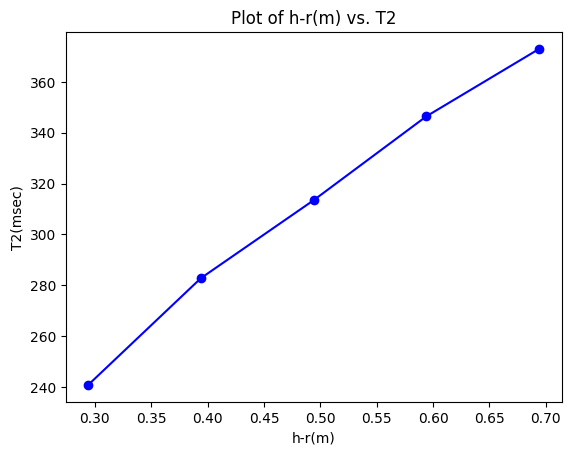

In [ ]:
# Plot 'h-r(m)' against 'T2'
plt.plot(df['h-r(m)'], df['T2(msec)'], marker='o', linestyle='-', color='blue')

# Set the axis labels
plt.xlabel('h-r(m)')
plt.ylabel('T2(msec)')

# Set the title
plt.title('Plot of h-r(m) vs. T2')

# Display the plot
plt.show()